<IPython.core.display.Javascript object>


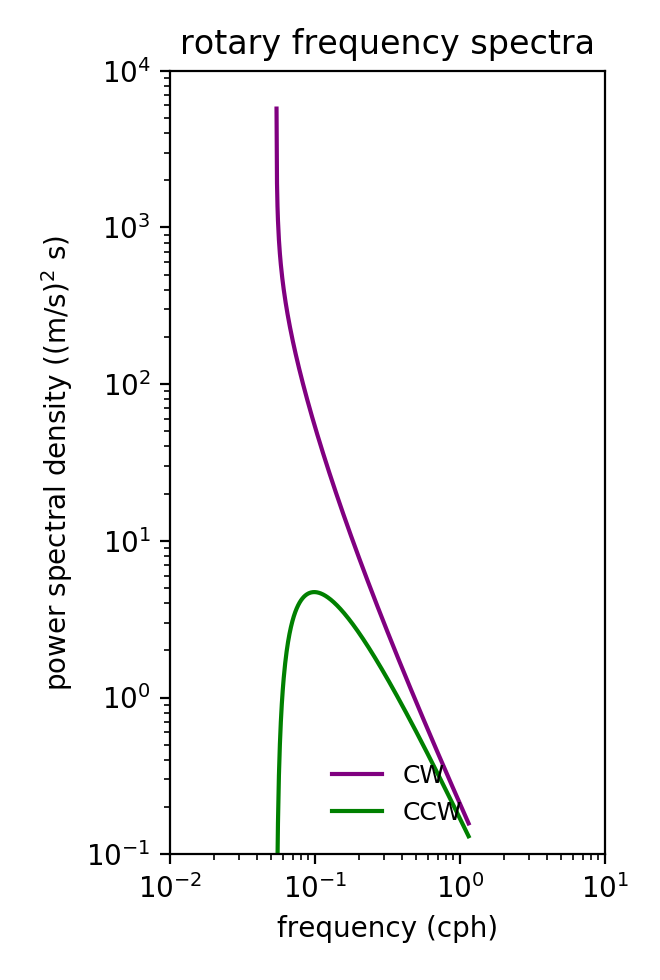

In [2]:
# This process is for comparing with rotary GM from literature:

# ----------------------------------------------------------------------------
# Copyright (C) 2016 Joern Callies
#
# This file is part of GM81.
#
# GM81 is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# GM81 is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with GM81. If not, see <http://www.gnu.org/licenses/>.
#
# This computes KE and PE frequency spectra as well as 1D horizontal wavenumber spectra.
# ----------------------------------------------------------------------------


import numpy as np
import matplotlib.pyplot as plt
import gm
%matplotlib notebook

# Coriolis frequency
f = 9.45e-5            # rad/s, lat 40.5 deg N, inertial period of 18.477 hours (1.50e-5 Hz)

# buoyancy frequency
N = 2e-3            # rad/s 

# surface-extrapolated buoyancy frequency
N0 = 5.24e-3           # as given in GM79 literature

# e-folding scale of N(z)
b = 1.3e3              # m, according to GM79 literature, p.285, this is fairly universal
#https://ocw.mit.edu/resources/res-12-000-evolution-of-physical-oceanography-spring-2007/part-2/wunsch_chapter9.pdf

# frequency
omg = np.logspace(np.log10(1.001*f), np.log10(N), 401)      

# horizontal wavenumber
k = 2*np.pi*np.logspace(-6, -2, 401)                       

# mode number
j = np.arange(1, 100)

# reshape to allow multiplication into 2D array
Omg = np.reshape(omg, (omg.size,1))
K = np.reshape(k, (k.size,1))
J = np.reshape(j, (1,j.size))

# frequency spectra (KE and PE)
K_omg_j = gm.K_omg_j(Omg, J, f, N, N0, b)
P_omg_j = gm.P_omg_j(Omg, J, f, N, N0, b)

# wavenumber spectra (KE and PE)
K_k_j = gm.K_k_j(K, J, f, N, N0, b)
P_k_j = gm.P_k_j(K, J, f, N, N0, b)

# sum over modes
K_omg = np.sum(K_omg_j, axis=1)
P_omg = np.sum(P_omg_j, axis=1)
K_k = np.sum(K_k_j, axis=1)
P_k = np.sum(P_k_j, axis=1)

# compute 1D spectra from 2D spectra
K_k_1d = gm.calc_1d(k, K_k)
P_k_1d = gm.calc_1d(k, P_k)

# compute rotary GM spectra, adapted from Levine 2002, and Polzin & Lvov 2011
cw_E = (omg + f)**2         # cw velocity variance per frequency (Levine, 2002, p.3168, eq.3)
ccw_E = (omg - f)**2        # ccw velocity variance per frequency
total_E = cw_E + ccw_E      # total variance
cw_K = (cw_E / total_E) * K_omg    
ccw_K = (ccw_E / total_E) * K_omg     
    
# plot rotary KE frequency spectra
fig, ax = plt.subplots(figsize=(3.3,4.9))
ax.loglog(omg*3600/(2*np.pi), cw_K*10000*(2*np.pi)/3600, label='CW', c='purple')
ax.loglog(omg*3600/(2*np.pi), ccw_K*10000*(2*np.pi)/3600, label='CCW', c='green')
ax.legend(frameon=False)
ax.set_xlim(1e-2,1e1)
ax.set_ylim(1e-1,1e4)
#ax.axvline(8.09e-5, color ='aqua',ls='--',lw=0.8,label = "$f$") 
#ax.axvline(1.49e-3, color ='orange',ls='--',lw=0.8,label = "$N$") 
ax.set_title('rotary frequency spectra')
ax.set_xlabel('frequency (cph)')
ax.set_ylabel('power spectral density ((m/s)$^2$ s)')
plt.legend(loc=(0.35,0.025), fontsize=9, frameon=False)
plt.tight_layout()
plt.show()